In [1]:
from Detector.detector import Detector_v3
from PIL import Image
import torch
from torchvision import transforms
import Detector.visualize as visualize  # TODO check imports
import re
import glob
import os
import numpy as np

In [2]:
detector = Detector_v3()

In [3]:
test_video_path = "2805_test.avi"
d = visualize.save_pred_video(test_video_path, "labelled/test.mp4", detector,num_frames=1000,visAngle=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

saving to:  labelled/test.mp4
width: 1440, height: 1080


100%|██████████| 1000/1000 [00:55<00:00, 18.10it/s]


Read :  0.0055993514060974124
BGR2RGB :  0.0010241730213165284
fromarray :  0.001278001070022583
resize_image :  0.02043015766143799
Inference :  0.018017189025878906
Detect_draw :  0.0004198746681213379
Write :  0.007979461908340453


In [5]:
for k in d.keys():
    print(k,": ",round(1/d[k].mean()))
d['Total'] = np.sum(np.stack([d[k] for k in d.keys() if k!='Total'],axis=1),axis=1)
print("Average FPS: ",round(1/d['Total'].mean()))

Read :  188.0
BGR2RGB :  1168.0
fromarray :  814.0
resize_image :  92.0
Inference :  66.0
Detect_draw :  3280.0
Write :  130.0
Total :  24.0
Average FPS:  24.0


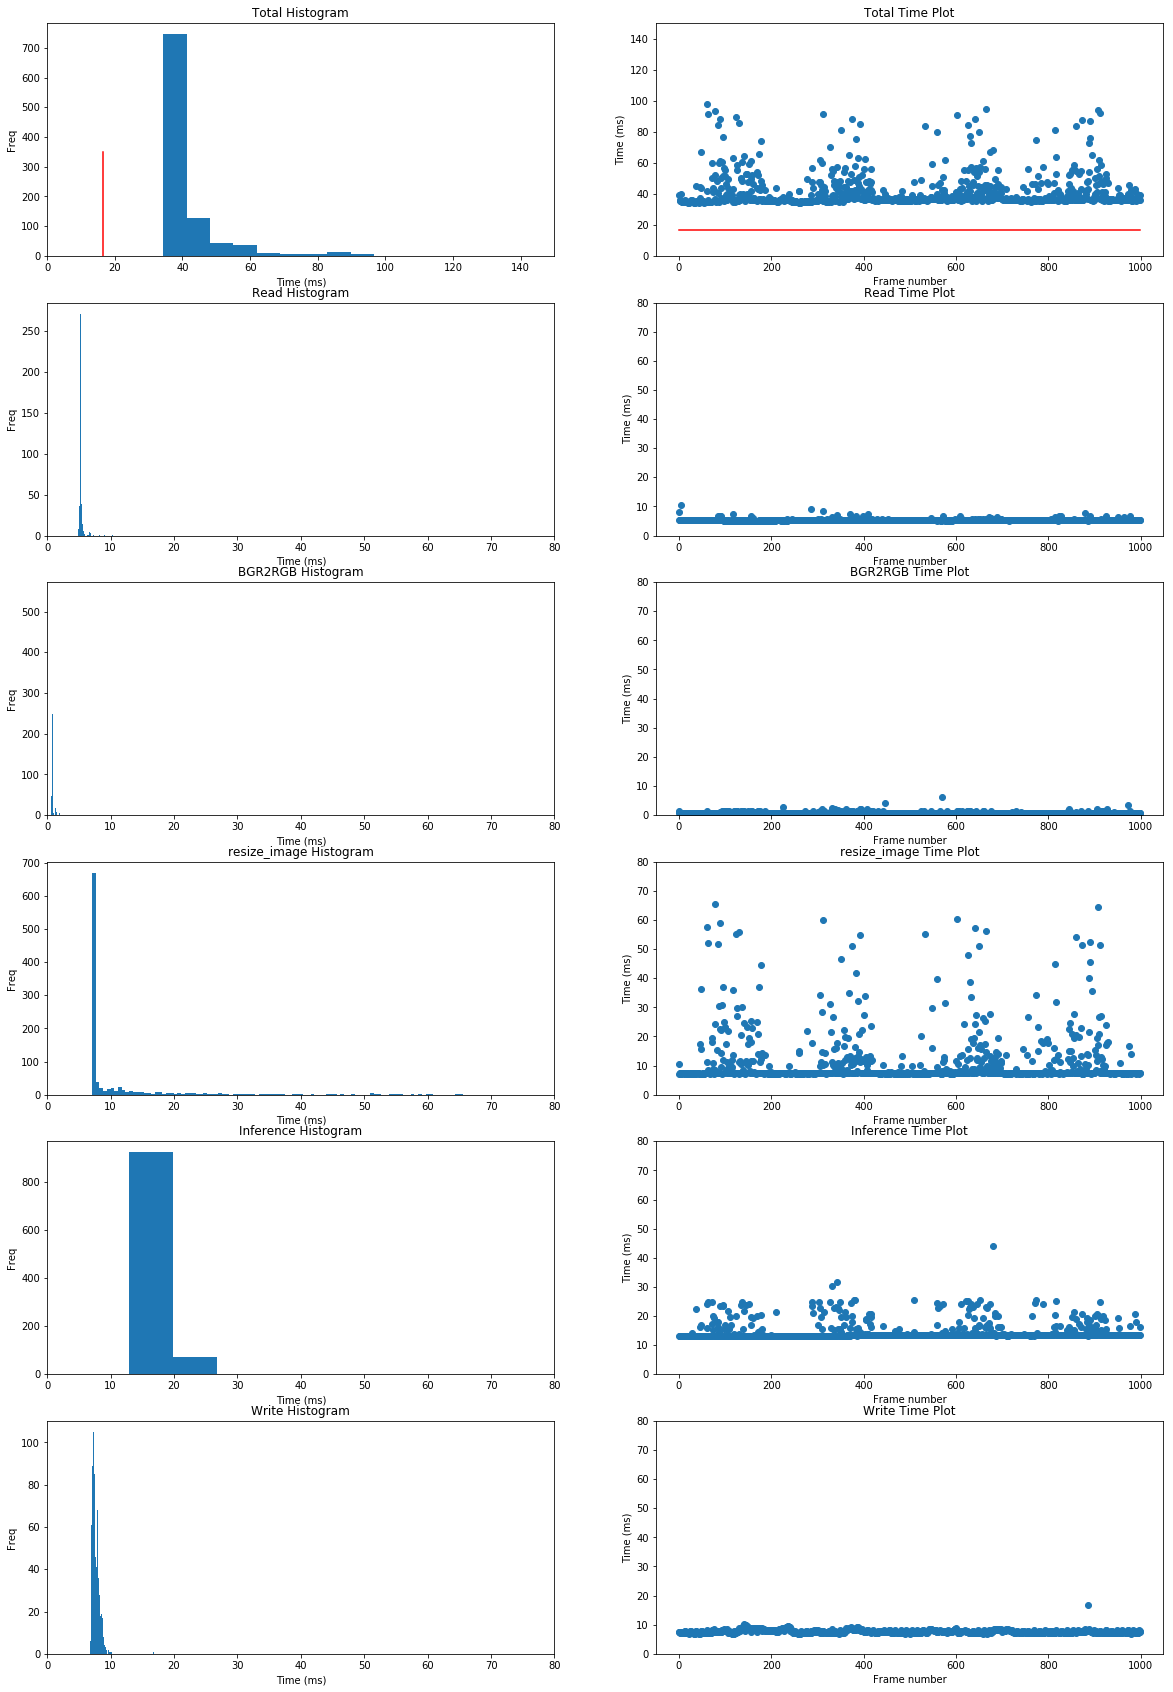

In [6]:
import matplotlib.pyplot as plt
import numpy as np
phases = ['Read','BGR2RGB','resize_image','Inference','Write']
fig,axs = plt.subplots(len(phases)+1,2,figsize=(20,30))
k='Total'
axs[0][0].set_title(k+' Histogram')
axs[0][1].set_title(k+' Time Plot')
axs[0][0].hist(d[k]*1000,label=k,bins=100)
axs[0][0].set_xlim(0,150)
axs[0][0].set_xlabel('Time (ms)')
axs[0][1].set_xlabel('Frame number')
axs[0][0].set_ylabel('Freq')
axs[0][1].set_ylabel('Time (ms)')
axs[0][1].scatter(np.arange(d[k].shape[0]),d[k]*1000)
axs[0][1].set_ylim(0,150)
axs[0][0].plot(np.ones(350)*16.6,np.arange(350),color='r')
axs[0][1].plot(np.arange(1000),np.ones(1000)*16.6,color='r')
for i,k in enumerate(phases):
    i+=1
    axs[i][0].set_title(k+' Histogram')
    axs[i][1].set_title(k+' Time Plot')
    axs[i][0].hist(d[k]*1000,label=k,bins=100)
    axs[i][0].set_xlim(0,80)
    axs[i][0].set_xlabel('Time (ms)')
    axs[i][1].set_xlabel('Frame number')
    axs[i][0].set_ylabel('Freq')
    axs[i][1].set_ylabel('Time (ms)')
    axs[i][1].scatter(np.arange(d[k].shape[0]),d[k]*1000)
    axs[i][1].set_ylim(0,80)
#plt.savefig('timings.jpg')

In [3]:
test_video_path = "/media/sil2/regev/pose_estimation/Arena/output/20200521-195335/19506481-0000.avi"
vid_name = '19506481-0000.avi'
path_to = '/media/sil2/regev/pose_estimation/Arena/output/20200521'
L = glob.glob(path_to+'*')
video_paths = []
output_paths = []
for file in L:
    vid_time = re.search('20200521-(\d+)',file).group(1)
    p = os.path.join(path_to+'-'+vid_time,vid_name)
    if os.path.exists(p):
        video_paths.append(p)
        output_paths.append("labelled/arrow_" + vid_time + ".mp4")
        
video_paths

['/media/sil2/regev/pose_estimation/Arena/output/20200521-172245/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172519/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172637/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-172842/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173206/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173410/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-173606/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174011/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174247/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-174430/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-175816/19506481-0000.avi',
 '/media/sil2/regev/pose_estimation/Arena/output/20200521-180046/

In [5]:
for i in range(len(video_paths)):
    if re.search('20200521-(\d+)',video_paths[i]).group(1)[:2]=='17':
        continue
    inf_time = visualize.save_pred_video(video_paths[i], video_paths[i], detector)
    #print("Inference framerate:", 1/inf_time)

  0%|          | 2/1000 [00:00<01:03, 15.82it/s]

saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-180046/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:00, 16.45it/s]

missed:  865
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-180515/19506481-0000.avi


  2%|▏         | 2/100 [00:00<00:06, 14.35it/s]

missed:  977
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-183826/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:01, 16.15it/s]

missed:  100
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-192211/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:09, 14.29it/s]

missed:  180
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-193850/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:15, 13.24it/s]

missed:  142
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-194241/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:11, 14.02it/s]

missed:  1000
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-194725/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:04, 15.43it/s]

missed:  185
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-194937/19506481-0000.avi


  0%|          | 2/1000 [00:00<01:04, 15.39it/s]

missed:  994
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-195012/19506481-0000.avi


  0%|          | 2/1000 [00:00<00:54, 18.24it/s]

missed:  718
saving to:  /media/sil2/regev/pose_estimation/Arena/output/20200521-195103/19506481-0000.avi


 64%|██████▍   | 642/1000 [00:26<00:14, 24.49it/s]


KeyboardInterrupt: 